In [3]:
import gym
import random
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
# Storing the Taxi v3 environment into env and renders environment
# by adding .env to the end of gym.make we can allow for more than 200 iterations the default in the new version of Gym.
env = gym.make("Taxi-v3").env
env.reset()

304

In [5]:
# Shows space sizes

env.render()
# We can see below that the pipe presentes the walls, the yellow block represents the agnet
#The RGYB represent the possible pickup/destinations.
#Printing Action Space and State Sapce
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [6]:
# (taxi row, taxi column, passenger index, destination index)
# Here we find the state of where our Taxi is currently at.
state = env.encode(3, 3, 2, 0)
print("State:", state)

env.s = state
env.render()

State: 368
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
#reward table structure {action: [(probability, nextstate, reward, done)]}
env.P[368]

{0: [(1.0, 468, -1, False)],
 1: [(1.0, 268, -1, False)],
 2: [(1.0, 388, -1, False)],
 3: [(1.0, 368, -1, False)],
 4: [(1.0, 368, -10, False)],
 5: [(1.0, 368, -10, False)]}

In [8]:
# set environment to illustration's state
env.env.s = 368

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))


Timesteps taken: 5541
Penalties incurred: 1768


In [9]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])#.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 5541
State: 0
Action: 5
Reward: 20


In [10]:
# A q-table with a 500x6 matrix of zeros, since there are 500 states in the Taxi Problem and 6 actions as the agent explores the environment, the q-table will be modified to act as a form of memory about the reward system
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [15]:
%%time
#Training the Agent

#initialise the q table

q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)
# setting Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
episodes = 500
# For plotting metrics
all_epochs = []
all_penalties = []
episode_reward = 0
q_episode_reward_list = []

#train over 500 episodes
for i in range(1, 500):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    
    done = False
    
    
    while not done:
        #decide on exploration or exploitation based on comparison between random number (0-1) and epsilon
        if random.uniform(0, 1) < epsilon:
            # Explore action space
            action = env.action_space.sample() 
        else:
            # Exploit learned values
            action = np.argmax(q_table[state]) 
        episode_reward = episode_reward + reward
    
        #Next action
        next_state, reward, done, info = env.step(action) 
        
        #get old q_value
        old_value = q_table[state, action]
        #obtain the maximum reward for next state
        next_max = np.max(q_table[next_state])
        #obtain new q value after action was taken
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        #update q_table with new q value
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    q_episode_reward_list.append(episode_reward)
    episode_reward = 0
 
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")
print(f"Results after {episodes} episodes:")

Episode: 400
Training finished.

Results after 500 episodes:
Wall time: 1.54 s


In [16]:
# Q-Values
q_table[328]

array([-2.21778107, -2.21652644, -2.21008949, -2.21213883, -5.090621  ,
       -5.05755966])

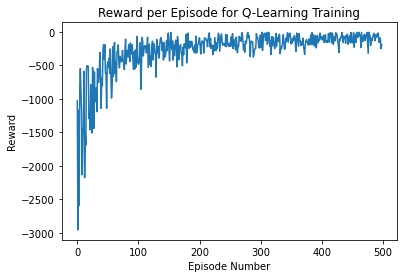

In [17]:
#plot the reward for each training episode -  q-learning
plt.plot(q_episode_reward_list)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Q-Learning Training")
plt.show()